The autor of this blog obviously has no clue what he is doing.

In [1]:
import os
import pandas as pd          
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# from pandas import Series
%matplotlib inline 
import warnings  # To ignore the warnings warnings.filterwarnings("ignore")

In [2]:
os.chdir('..')

In [3]:
!pwd

/Users/A.IVA/Documents/jupyter_notebooks/rest/coursera_and_blogs/time_series


##### 1 Load data

In [4]:
data_dir = os.path.join('data', 'analyticsvidhya_tutorial')
train=pd.read_csv(os.path.join(data_dir, 'Train_SU63ISt.csv')) 
test=pd.read_csv(os.path.join(data_dir, 'Test_0qrQsBZ.csv'))

# train_original=train.copy() 
# test_original=test.copy()

In [5]:
display(train.columns, test.columns)
display(train.dtypes, test.dtypes)
display(train.shape, test.shape)
display(train.head(2))
display(test.head(2))

Index(['ID', 'Datetime', 'Count'], dtype='object')

Index(['ID', 'Datetime'], dtype='object')

ID           int64
Datetime    object
Count        int64
dtype: object

ID           int64
Datetime    object
dtype: object

(18288, 3)

(5112, 2)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2


,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00


##### 2 Features generation

In [6]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M') 

for i in (train, test):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour


def is_weekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 


train['day of week']=train['Datetime'].dt.dayofweek 
train['weekend']=train['Datetime'].apply(is_weekend)
train.index = train['Datetime']

test['day of week']=test['Datetime'].dt.dayofweek 
test['weekend']=test['Datetime'].apply(is_weekend)
test.index = test['Datetime']

In [7]:
train.head(3)

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1


##### 3 Data exploration (plots)

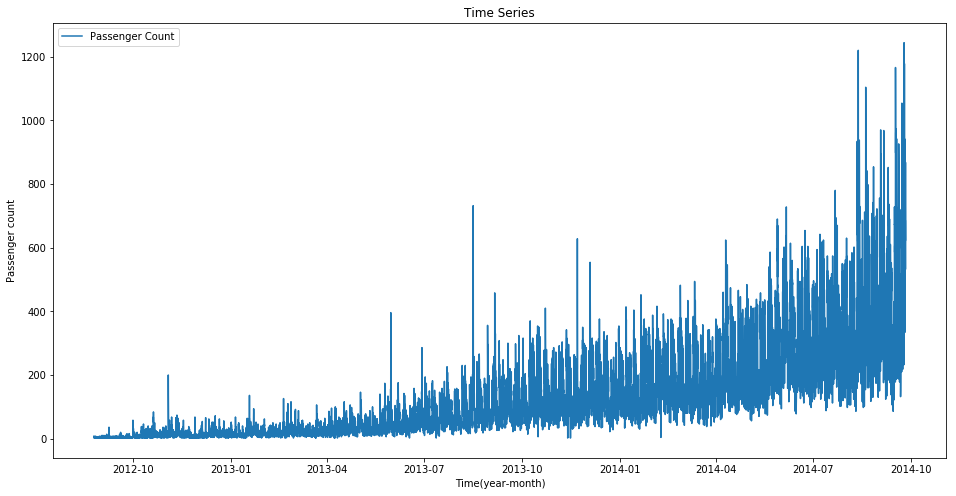

In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df=train.drop('ID',1).copy()
ts=df['Count'] 

plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

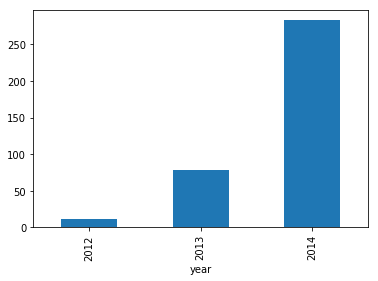

In [9]:
train.groupby('year')['Count'].mean().plot.bar()

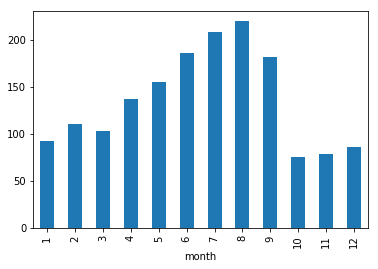

In [10]:
# this is a BAD idea since we average over several years
train.groupby('month')['Count'].mean().plot.bar()

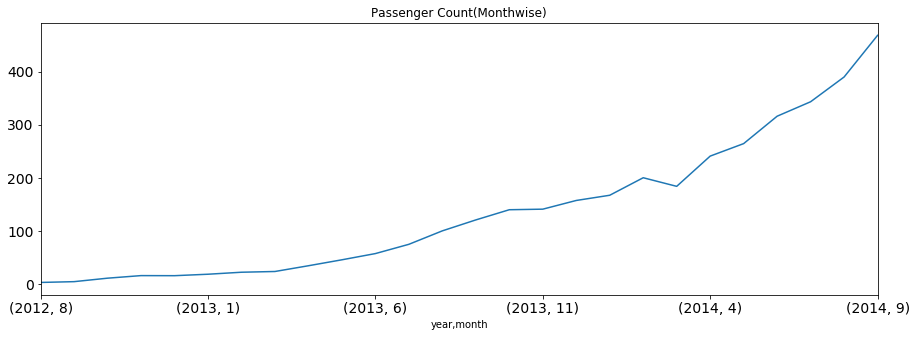

In [11]:
train.groupby(['year', 'month'])['Count'].mean()\
    .plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

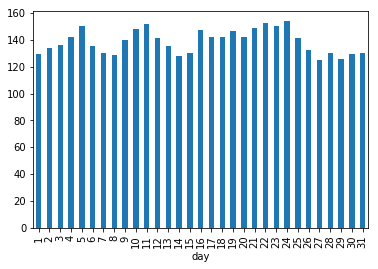

In [12]:
# I would do this after the trend is subtracted !!!!!!!!!!!!!!!!!
train.groupby('day')['Count'].mean().plot.bar()

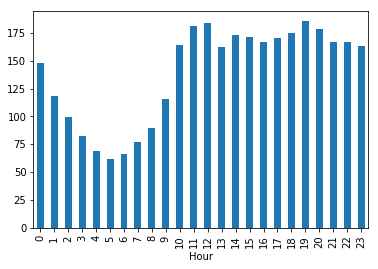

In [13]:
train.groupby('Hour')['Count'].mean().plot.bar()

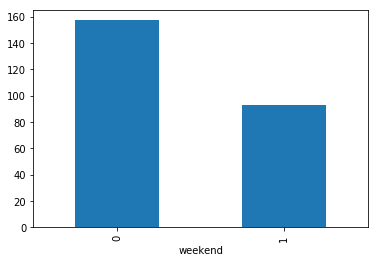

In [14]:
train.groupby('weekend')['Count'].mean().plot.bar()

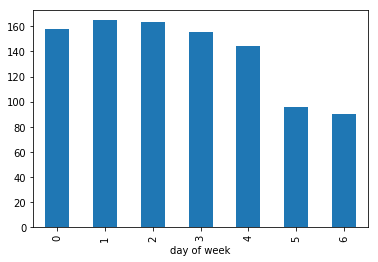

In [15]:
train.groupby('day of week')['Count'].mean().plot.bar()

##### 4 Data aggregation over time (coarse graining)

In [16]:
print(train.dtypes)
train.head(2)

ID                      int64
Datetime       datetime64[ns]
Count                   int64
year                    int64
month                   int64
day                     int64
Hour                    int64
day of week             int64
weekend                 int64
dtype: object


,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1


In [17]:
# Lets look at the time differences
# It seems that there is no need to fill in missing values
dt = (train['Datetime']-train['Datetime'].shift(1)).apply(lambda x: x.total_seconds())
dt.value_counts()

3600.0    18287
Name: Datetime, dtype: int64

In [18]:
hourly = train.resample('H').mean() 
daily = train.resample('D').mean() 
weekly = train.resample('W').mean() 
monthly = train.resample('M').mean()

hourly.shape, train.shape, daily.shape

((18288, 8), (18288, 9), (762, 8))

In [19]:
display(hourly.head(2))
display(daily.head(2))
display(weekly.head(2))

,ID,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,0,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2,2012,8,25,1,5,1


,ID,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0


,ID,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-26,23.5,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,131.5,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714


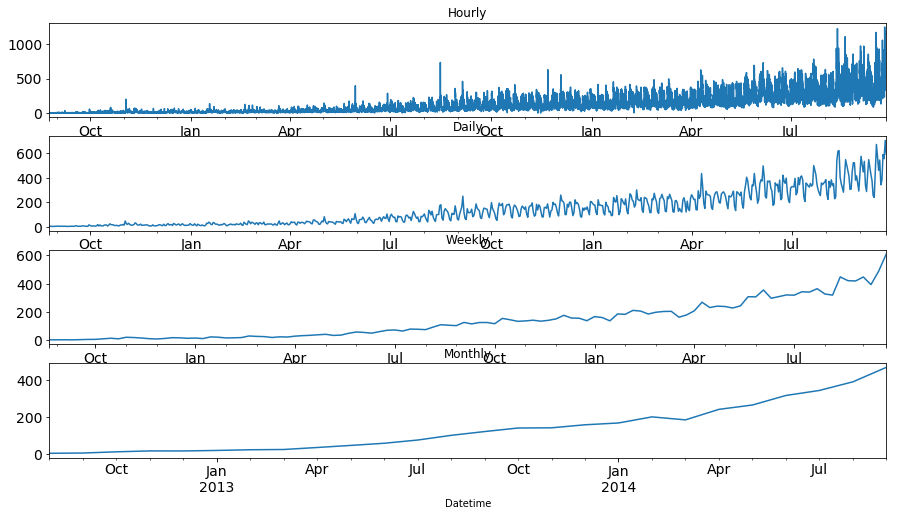

In [20]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

##### 5 Data for ML?

In [22]:
daily_train = train.resample('D').mean()
daily_test = test.resample('D').mean() 

display(daily_train.head(2))
display(daily_test.head(2))

,ID,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0


,ID,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,4.0,0.0
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,5.0,1.0


In [25]:
daily_train[-2:].head()

,ID,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2014-09-24,18251.5,702.333333,2014.0,9.0,24.0,11.5,2.0,0.0
2014-09-25,18275.5,589.666667,2014.0,9.0,25.0,11.5,3.0,0.0


In [29]:
daily_train_=train.loc['2012-08-25':'2014-06-24'] 
daily_valid_=train.loc['2014-06-25':'2014-09-25']

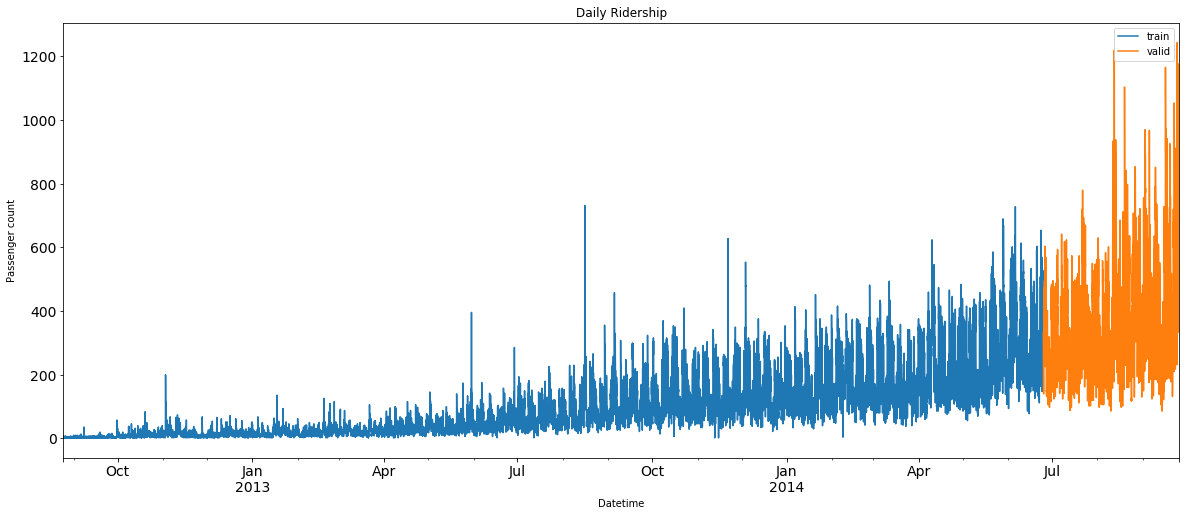

In [31]:
daily_train_.Count.plot(figsize=(20,8), title= 'Daily Ridership', fontsize=14, label='train') 
daily_valid_.Count.plot(figsize=(20,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

##### 6 Some simple prediction models

###### 6.1 the worst possible

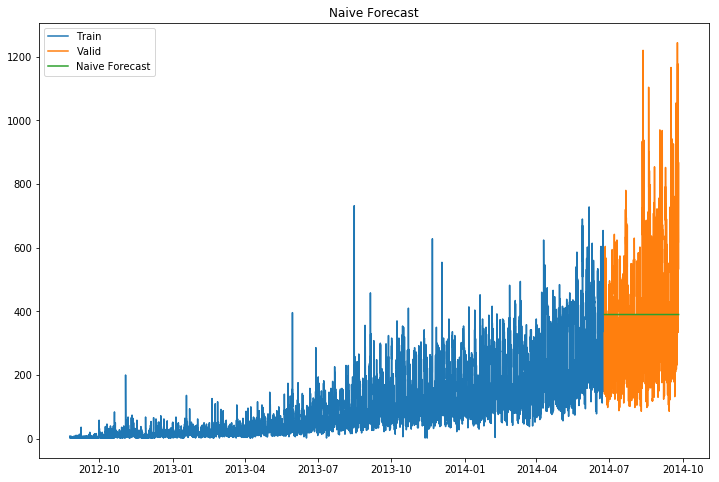

In [33]:
daily_valid_1 = daily_valid_.copy() 
daily_valid_1['naive'] = daily_train_.Count[-1]

plt.figure(figsize=(12,8)) 
plt.plot(daily_train_.index, daily_train_['Count'], label='Train') 
plt.plot(daily_valid_.index, daily_valid_['Count'], label='Valid') 
plt.plot(daily_valid_1.index, daily_valid_1['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error 

rms = mean_squared_error(daily_valid_1.Count, daily_valid_1.naive)
rms

34735.15053763441